In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

%matplotlib widget

In [2]:
df = pd.read_csv("bitcoin.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Vol.
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K


In [4]:
df.describe()

,Open,High,Low,Close
count,3793.000000,3793.000000,3793.000000,3793.000000
mean,11233.252307,11529.297996,10904.581545,11240.315766
std,15421.568722,15827.119004,14960.319732,15422.533996
min,13.300000,13.400000,13.200000,13.300000
25%,450.300000,459.600000,441.900000,451.400000
50%,5208.300000,5322.900000,5033.700000,5209.100000
75%,14976.200000,15648.300000,13902.300000,15043.000000
max,67528.700000,68990.600000,66334.900000,67527.900000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3793 non-null   object 
 1   Open    3793 non-null   float64
 2   High    3793 non-null   float64
 3   Low     3793 non-null   float64
 4   Close   3793 non-null   float64
 5   Vol.    3793 non-null   object 
dtypes: float64(4), object(2)
memory usage: 177.9+ KB


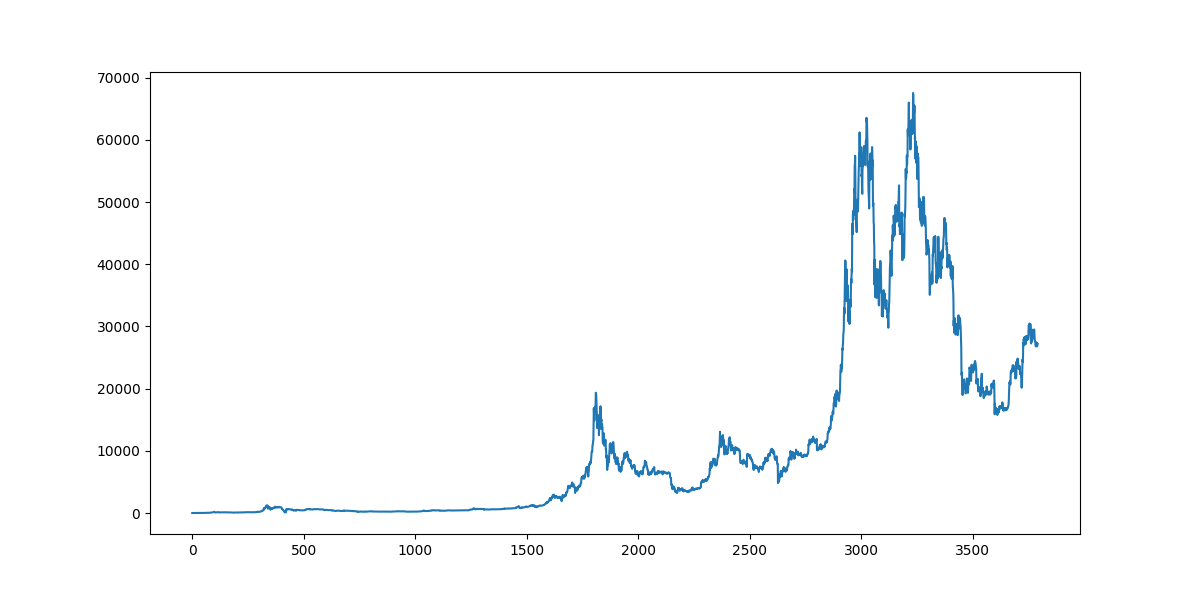

In [6]:
plt.close()
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.show()

In [7]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
Vol.     0
dtype: int64

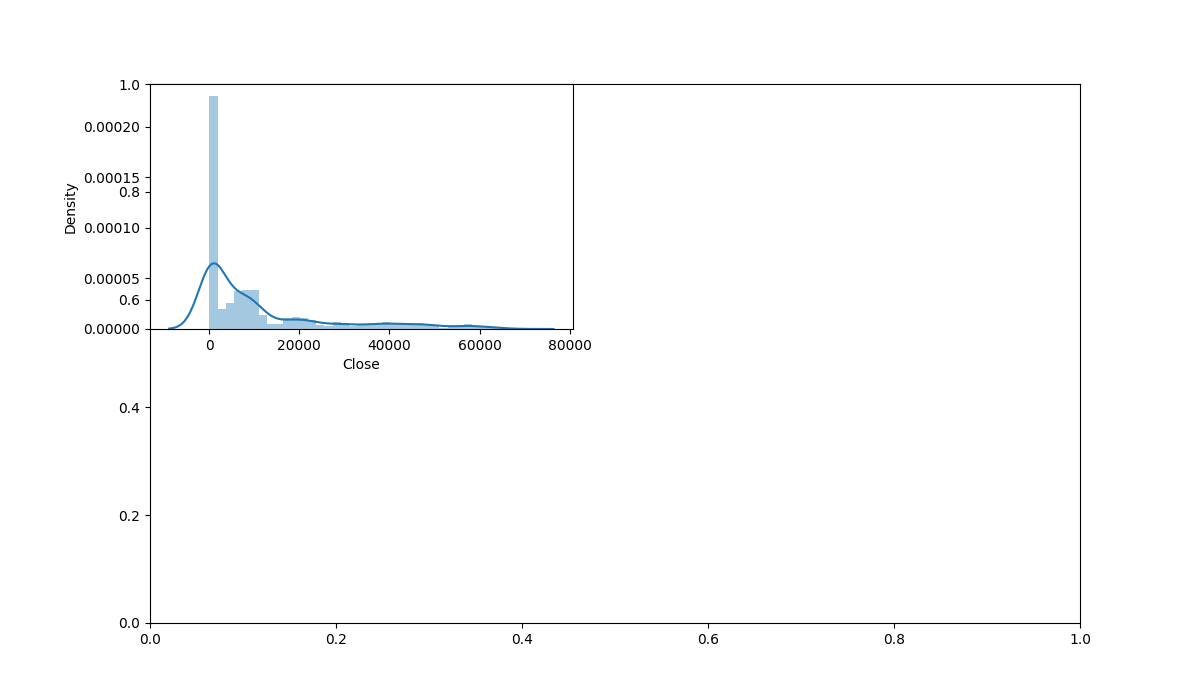

In [8]:
plt.close()
plt.subplots(figsize=(12,7))

plt.subplot(2,2,1)
sb.distplot(df['Close'])
plt.show()

In [9]:
splited = df['Date'].str.split('-',expand=True)

In [10]:
df['year'] = splited[0].astype('int')
df['month'] = splited[1].astype('int')
df['day'] = splited[2].astype('int')
df

,Date,Open,High,Low,Close,Vol.,year,month,day
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K,2013,1,1
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K,2013,1,2
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K,2013,1,3
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K,2013,1,4
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K,2013,1,5
...,...,...,...,...,...,...,...,...,...
3788,2023-05-17,27035.5,27465.3,26597.7,27403.1,58.14K,2023,5,17
3789,2023-05-18,27403.8,27467.0,26449.8,26828.0,63.39K,2023,5,18
3790,2023-05-19,26828.2,27154.7,26711.3,26882.9,36.67K,2023,5,19
3791,2023-05-20,26883.0,27147.2,26831.3,27116.2,17.72K,2023,5,20


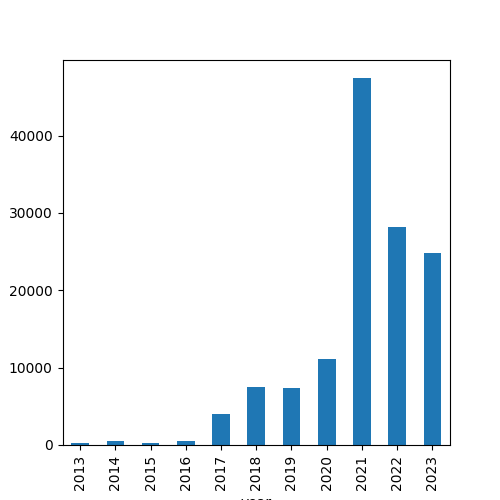

In [11]:
# plt.close()
# data_grouped = df.groupby('year')['Close'].mean()

# plt.subplots(figsize=(7,7))

# plt.subplot(2,2,1)
# data_grouped.plot.bar()
# plt.show()




plt.close() 
data_grouped = df.groupby('year')['Close'].mean() 
plt.subplots(figsize=(5,5))
plt.subplot(1,1,1) 
data_grouped.plot.bar() 
plt.show()

In [12]:
df['is_quarter_end'] = np.where(df['month']%3 ==0,1,0)

In [13]:
df.head()

,Date,Open,High,Low,Close,Vol.,year,month,day,is_quarter_end
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K,2013,1,1,0
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K,2013,1,2,0
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K,2013,1,3,0
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K,2013,1,4,0
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K,2013,1,5,0


In [14]:
df['open-close'] = df['Close'] - df['Open']
df['high-low'] = df['High'] - df['Low']

In [15]:
df['open-close']

0        -0.2
1         0.0
2         0.1
3         0.1
4        -0.1
        ...  
3788    367.6
3789   -575.8
3790     54.7
3791    233.2
3792     65.0
Name: open-close, Length: 3793, dtype: float64

In [16]:
df['high-low']

0          0.4
1          0.2
2          0.2
3          0.2
4          0.3
         ...  
3788     867.6
3789    1017.2
3790     443.4
3791     315.9
3792     190.6
Name: high-low, Length: 3793, dtype: float64

In [17]:
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1 ,0)

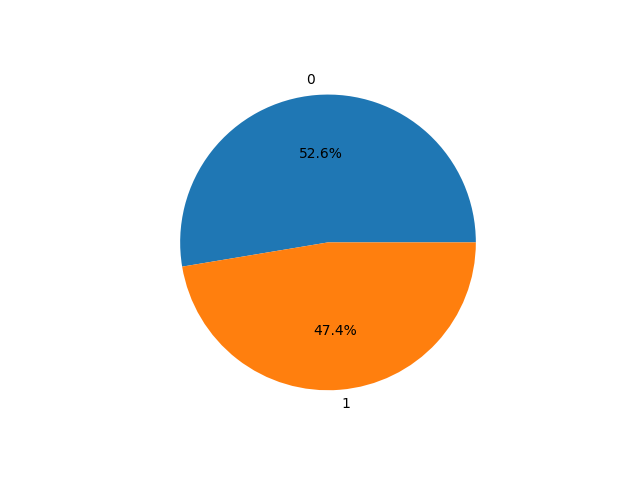

In [18]:
plt.close()
plt.pie(df['target'].value_counts().values,
        labels=[0,1],autopct='%1.1f%%')
plt.show()

In [19]:
features = df[['open-close','high-low','is_quarter_end']]
target = df['target']

In [20]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train , x_valid , Y_train , Y_valid = train_test_split(features,target, test_size=0.15, random_state=2022)
print(X_train.shape, x_valid.shape)

(3224, 3) (569, 3)


In [21]:
model = KNeighborsClassifier()
model.max_iter = 10000

model.fit(X_train, Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:

models = [
    ("Logistic Regression", LogisticRegression(max_iter=10000)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

results = []

for name, clf in models:
    clf.fit(X_train, Y_train)

    price = [[9672, -3176, 0]]
    prediction = clf.predict(price)[0]

    accuracy = clf.score(x_valid, Y_valid) * 100

    roc_auc = None
    if hasattr(clf, "predict_proba"):
        roc_auc = metrics.roc_auc_score(Y_valid, clf.predict_proba(x_valid)[:, 1])

    results.append({
        "Model": name,
        "Prediction (Next Day)": prediction,
        "Accuracy (%)": round(accuracy, 2),
        "ROC AUC": round(roc_auc, 4) if roc_auc is not None else "N/A"
    })

df_results = pd.DataFrame(results)
print(df_results)

                 Model  Prediction (Next Day)  Accuracy (%)  ROC AUC
0  Logistic Regression                      0         52.02   0.5419
1        Decision Tree                      1         52.72   0.5249
2  K-Nearest Neighbors                      0         54.31   0.5576
